# Import library

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import joblib
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Data Understanding

In [86]:
# Load Data
df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/employee/employee_data.csv")
print('Ukuran dataset: ', df.shape)
df.head()

Ukuran dataset:  (1470, 35)


,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


Dataset ini terdiri dari **1470 baris data** dan **35 atribut**. Berikut adalah penjelasan tiap kolom:

* **EmployeeId** - ID unik karyawan  
* **Attrition** - Apakah karyawan mengundurkan diri? (0 = tidak, 1 = ya)  
* **Age** - Usia karyawan  
* **BusinessTravel** - Frekuensi perjalanan dinas karyawan  
* **DailyRate** - Gaji harian  
* **Department** - Departemen tempat karyawan bekerja  
* **DistanceFromHome** - Jarak dari rumah ke tempat kerja (dalam km)  
* **Education** - Tingkat pendidikan:  
  1 = Di bawah Perguruan Tinggi,  
  2 = Perguruan Tinggi,  
  3 = Sarjana,  
  4 = Magister,  
  5 = Doktor  
* **EducationField** - Bidang pendidikan  
* **EnvironmentSatisfaction** - Kepuasan terhadap lingkungan kerja:  
  1 = Rendah,  
  2 = Sedang,  
  3 = Tinggi,  
  4 = Sangat Tinggi  
* **Gender** - Jenis kelamin karyawan  
* **HourlyRate** - Gaji per jam  
* **JobInvolvement** - Tingkat keterlibatan dalam pekerjaan:  
  1 = Rendah,  
  2 = Sedang,  
  3 = Tinggi,  
  4 = Sangat Tinggi  
* **JobLevel** - Tingkatan jabatan (1 sampai 5)  
* **JobRole** - Posisi atau jabatan pekerjaan  
* **JobSatisfaction** - Kepuasan terhadap pekerjaan:  
  1 = Rendah,  
  2 = Sedang,  
  3 = Tinggi,  
  4 = Sangat Tinggi  
* **MaritalStatus** - Status pernikahan  
* **MonthlyIncome** - Gaji bulanan  
* **MonthlyRate** - Gaji per bulan berdasarkan tarif tetap  
* **NumCompaniesWorked** - Jumlah perusahaan yang pernah menjadi tempat kerja  
* **Over18** - Apakah usia di atas 18 tahun?  
* **OverTime** - Apakah karyawan sering lembur?  
* **PercentSalaryHike** - Persentase kenaikan gaji tahun lalu  
* **PerformanceRating** - Penilaian kinerja:  
  1 = Rendah,  
  2 = Baik,  
  3 = Sangat Baik,  
  4 = Luar Biasa  
* **RelationshipSatisfaction** - Kepuasan terhadap hubungan di tempat kerja:  
  1 = Rendah,  
  2 = Sedang,  
  3 = Tinggi,  
  4 = Sangat Tinggi  
* **StandardHours** - Jam kerja standar  
* **StockOptionLevel** - Level opsi saham yang dimiliki  
* **TotalWorkingYears** - Total tahun pengalaman kerja  
* **TrainingTimesLastYear** - Jumlah pelatihan yang diikuti tahun lalu  
* **WorkLifeBalance** - Keseimbangan kerja dan kehidupan pribadi:  
  1 = Rendah,  
  2 = Baik,  
  3 = Sangat Baik,  
  4 = Luar Biasa  
* **YearsAtCompany** - Jumlah tahun bekerja di perusahaan saat ini  
* **YearsInCurrentRole** - Jumlah tahun dalam posisi saat ini  
* **YearsSinceLastPromotion** - Jumlah tahun sejak terakhir kali mendapatkan promosi  
* **YearsWithCurrManager** - Jumlah tahun bekerja dengan manajer saat ini

In [3]:
# Cek data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [4]:
# cek duplicate
print('Jumlah data duplikat:', df.duplicated().sum())

Jumlah data duplikat: 0


In [5]:
# cek missing value
print("\n=== Missing Values ===")
print(df.isnull().sum())


=== Missing Values ===
EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance 

In [6]:
# Statistik dasar
df.describe().T

,count,mean,std,min,25%,50%,75%,max
EmployeeId,1470.0,735.500000,424.496761,1.0,368.25,735.5,1102.75,1470.0
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
Attrition,1058.0,0.169187,0.375094,0.0,0.00,0.0,0.00,1.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0


In [3]:
# Salin dataframe agar tidak mengubah df asli
df_viz = df.copy()

# Mapping manual
attrition_map = {0: 'No', 1: 'Yes'}
worklife_map = {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'}
satisfaction_map = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
education_map = {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}
marital_map = {0: 'Single', 1: 'Married', 2: 'Divorced'}

# Apply mapping
df_viz['Attrition'] = df_viz['Attrition'].map(attrition_map)
df_viz['WorkLifeBalance'] = df_viz['WorkLifeBalance'].map(worklife_map)
df_viz['JobSatisfaction'] = df_viz['JobSatisfaction'].map(satisfaction_map)
df_viz['EnvironmentSatisfaction'] = df_viz['EnvironmentSatisfaction'].map(satisfaction_map)
df_viz['Education'] = df_viz['Education'].map(education_map)

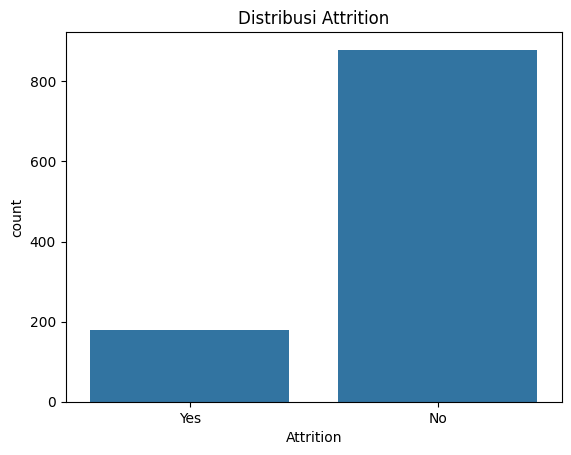

In [4]:
# Visualisasi attrition
sns.countplot(data=df_viz, x='Attrition')
plt.title('Distribusi Attrition')
plt.show()

Grafik distribusi attrition menunjukkan bahwa sebagian besar karyawan tidak mengalami attrition (bertahan di perusahaan), sedangkan hanya sebagian kecil (sekitar 15%) yang keluar dari perusahaan. Ketimpangan ini mencerminkan adanya ketidakseimbangan kelas yang signifikan dalam data, di mana jumlah karyawan yang bertahan jauh lebih banyak dibandingkan yang keluar.

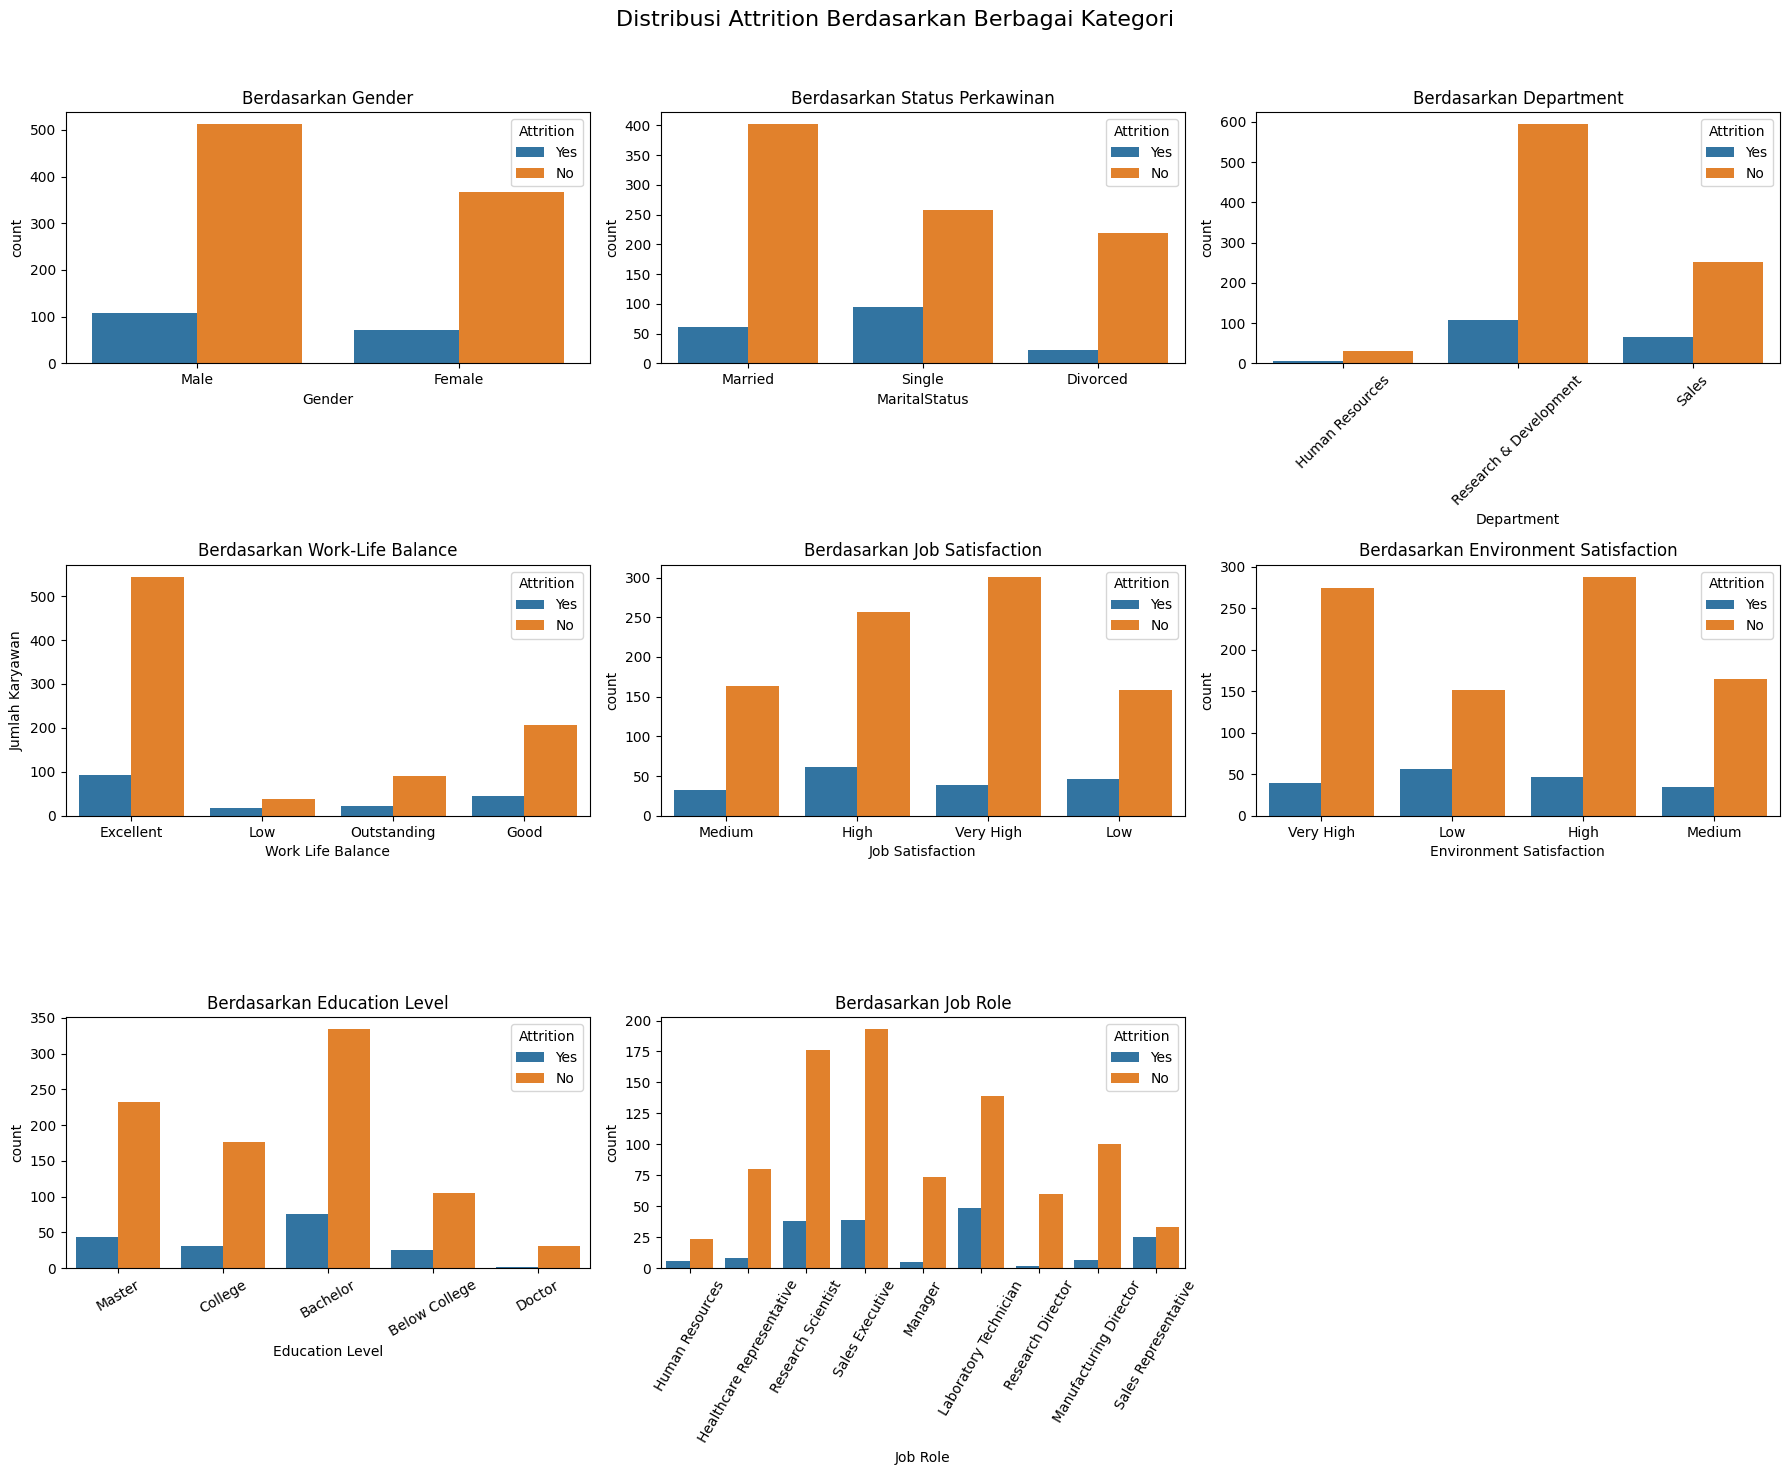

In [10]:
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('Distribusi Attrition Berdasarkan Berbagai Kategori', fontsize=16)

# Plot 1: Gender
sns.countplot(data=df_viz, x='Gender', hue='Attrition', ax=axes[0, 0])
axes[0, 0].set_title('Berdasarkan Gender')

# Plot 2: Marital Status
sns.countplot(data=df_viz, x='MaritalStatus', hue='Attrition', ax=axes[0, 1])
axes[0, 1].set_title('Berdasarkan Status Perkawinan')

# Plot 3: Department
sns.countplot(data=df_viz, x='Department', hue='Attrition', ax=axes[0, 2])
axes[0, 2].set_title('Berdasarkan Department')
axes[0, 2].tick_params(axis='x', rotation=45)

# Plot 4: Work Life Balance
sns.countplot(data=df_viz, x='WorkLifeBalance', hue='Attrition', ax=axes[1, 0])
axes[1, 0].set_title('Berdasarkan Work-Life Balance')
axes[1, 0].set_xlabel('Work Life Balance')
axes[1, 0].set_ylabel('Jumlah Karyawan')

# Plot 5: Job Satisfaction
sns.countplot(data=df_viz, x='JobSatisfaction', hue='Attrition', ax=axes[1, 1])
axes[1, 1].set_title('Berdasarkan Job Satisfaction')
axes[1, 1].set_xlabel('Job Satisfaction')

# Plot 6: Environment Satisfaction
sns.countplot(data=df_viz, x='EnvironmentSatisfaction', hue='Attrition', ax=axes[1, 2])
axes[1, 2].set_title('Berdasarkan Environment Satisfaction')
axes[1, 2].set_xlabel('Environment Satisfaction')

# Plot 7: Education
sns.countplot(data=df_viz, x='Education', hue='Attrition', ax=axes[2, 0])
axes[2, 0].set_title('Berdasarkan Education Level')
axes[2, 0].set_xlabel('Education Level')
axes[2, 0].tick_params(axis='x', rotation=30)

# Plot 7: Job Role
sns.countplot(data=df_viz, x='JobRole', hue='Attrition', ax=axes[2, 1])
axes[2, 1].set_title('Berdasarkan Job Role')
axes[2, 1].set_xlabel('Job Role')
axes[2, 1].tick_params(axis='x', rotation=60)

# Kosongkan 1 plot terakhir
axes[2, 2].axis('off')

# Perbaiki layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Visualisasi ini menggambarkan distribusi attrition (keluar atau tidaknya karyawan) berdasarkan berbagai variabel kategorik. Terlihat bahwa proporsi attrition cenderung lebih tinggi pada karyawan yang belum menikah (single), memiliki work-life balance rendah, tingkat kepuasan kerja dan lingkungan yang rendah, serta bekerja pada peran seperti Sales Representative dan Laboratory Technician. Hal ini menunjukkan bahwa kondisi kesejahteraan kerja dan stabilitas personal memengaruhi keputusan untuk bertahan di perusahaan. Selain itu, departemen seperti Research & Development dan Sales menunjukkan variasi signifikan dalam angka attrition antar job role.

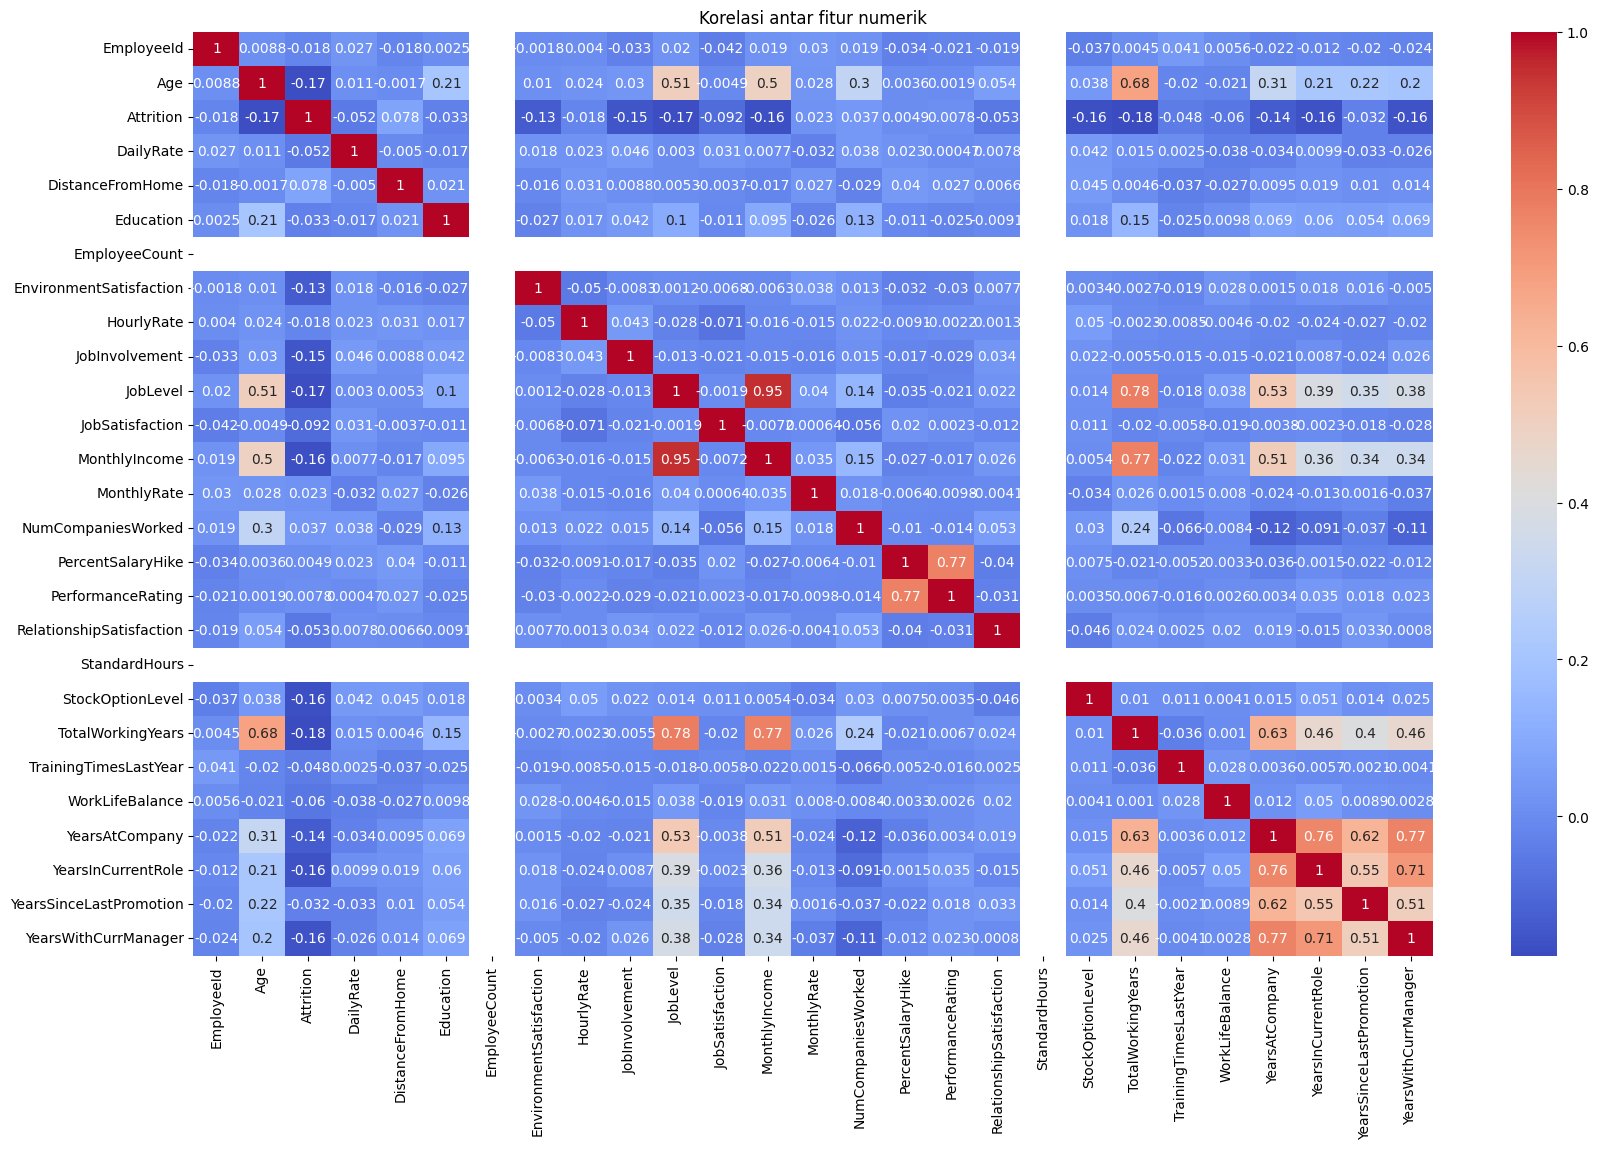

In [10]:
# Korelasi fitur numerik
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Korelasi antar fitur numerik')
plt.show()

Gambar di atas menunjukkan heatmap korelasi antar fitur numerik dalam dataset karyawan. Nilai korelasi ditunjukkan dalam skala -1 hingga 1, di mana warna merah menunjukkan korelasi positif kuat, dan biru menunjukkan korelasi negatif. Terlihat bahwa beberapa fitur memiliki korelasi kuat, seperti antara JobLevel dan MonthlyIncome (0.95), serta TotalWorkingYears dengan Age (0.68), yang masuk akal karena semakin lama seseorang bekerja, usia dan level jabatannya pun cenderung meningkat. Selain itu, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, dan YearsWithCurrManager juga saling berkorelasi cukup tinggi, mengindikasikan hubungan erat antar durasi kerja dalam perusahaan. Di sisi lain, fitur Attrition tidak menunjukkan korelasi yang kuat secara linear dengan fitur numerik lainnya, yang menunjukkan bahwa faktor yang memengaruhi keputusan karyawan untuk keluar mungkin lebih kompleks dan tidak sepenuhnya dapat dijelaskan oleh variabel numerik saja.

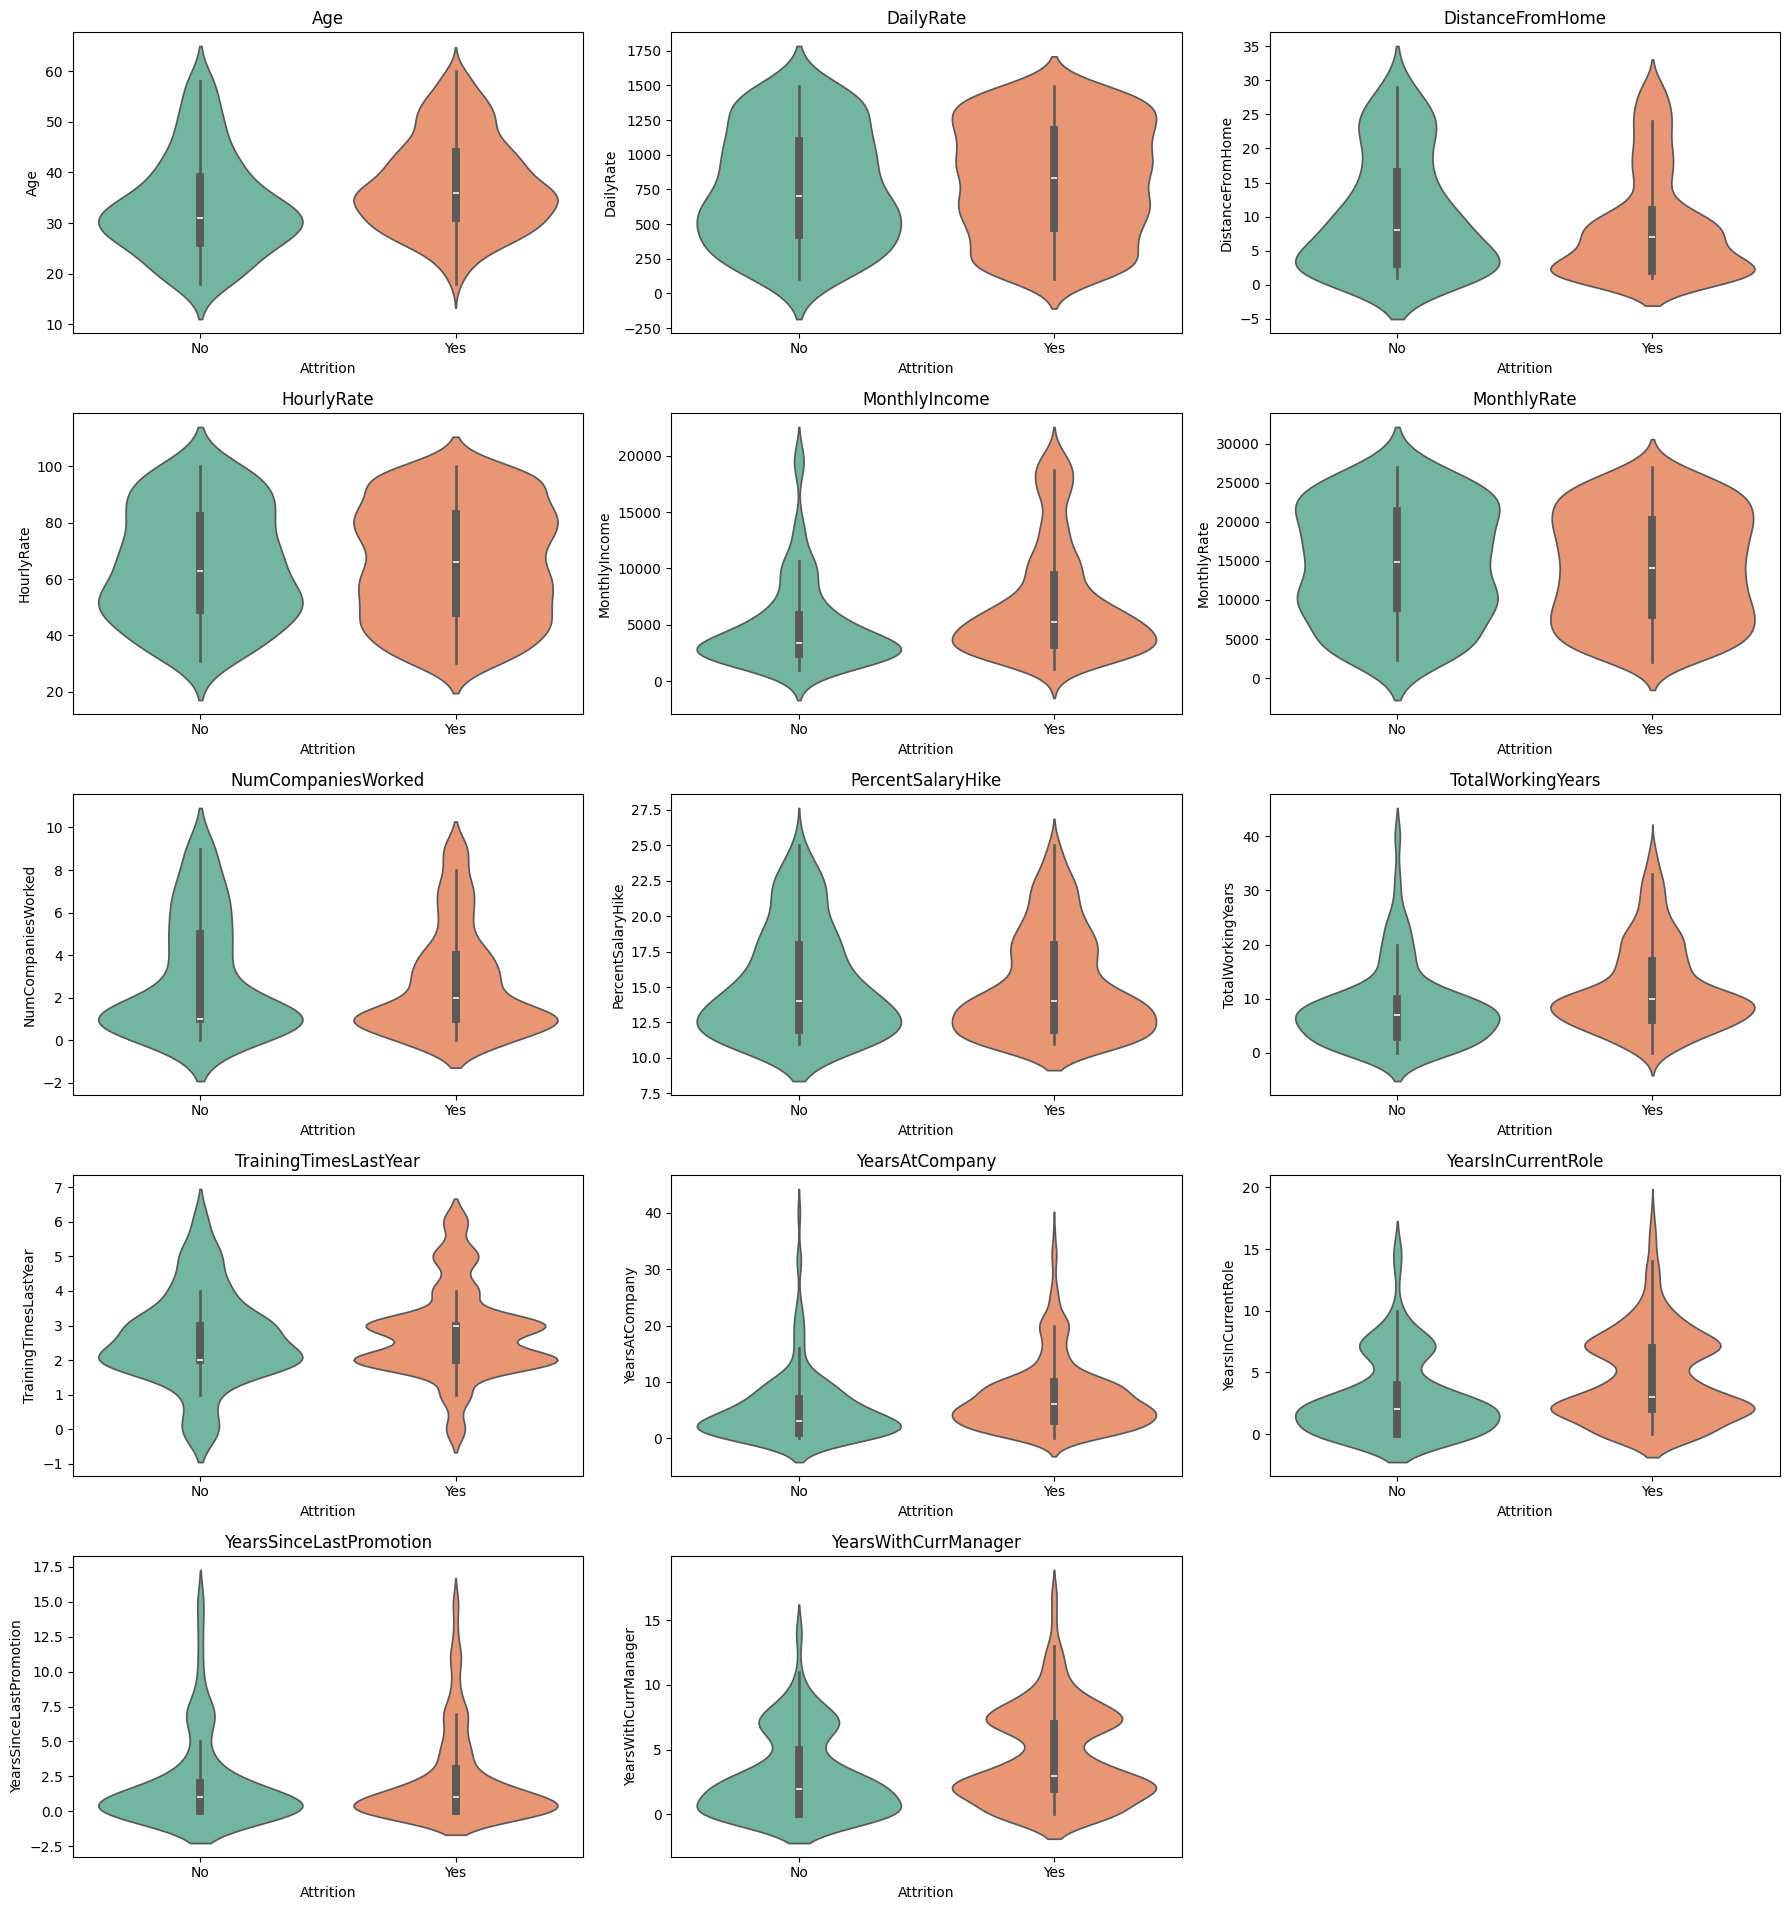

In [14]:
# Daftar variabel numerik
numeric_vars = [
    'Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
    'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
    'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
    'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'
]

# Tentukan ukuran grid
n_cols = 3
n_rows = (len(numeric_vars) + n_cols - 1) // n_cols  # Ceiling division

# Buat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))

# Loop variabel dan plot
for i, var in enumerate(numeric_vars):
    row, col = divmod(i, n_cols)
    sns.violinplot(x='Attrition', y=var, data=df_viz, ax=axes[row, col], palette='Set2', inner='box')
    axes[row, col].set_title(var)
    axes[row, col].set_xlabel('Attrition')
    axes[row, col].set_xticklabels(['No', 'Yes'])

# Kosongkan subplot sisa jika ada
total_plots = n_rows * n_cols
for j in range(len(numeric_vars), total_plots):
    row, col = divmod(j, n_cols)
    axes[row, col].axis('off')

# Perbaiki layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Visualisasi ini menunjukkan distribusi variabel numerik berdasarkan status attrition. Karyawan yang mengalami attrition cenderung memiliki usia, pendapatan bulanan, total tahun bekerja, serta masa kerja di perusahaan yang lebih rendah dibandingkan mereka yang bertahan. Selain itu, mereka cenderung memiliki lebih banyak jumlah perusahaan sebelumnya dan lebih sedikit pengalaman dengan manajer saat ini. Ini mengindikasikan bahwa pengalaman kerja yang lebih lama dan pendapatan yang lebih tinggi berkorelasi negatif dengan kemungkinan attrition.

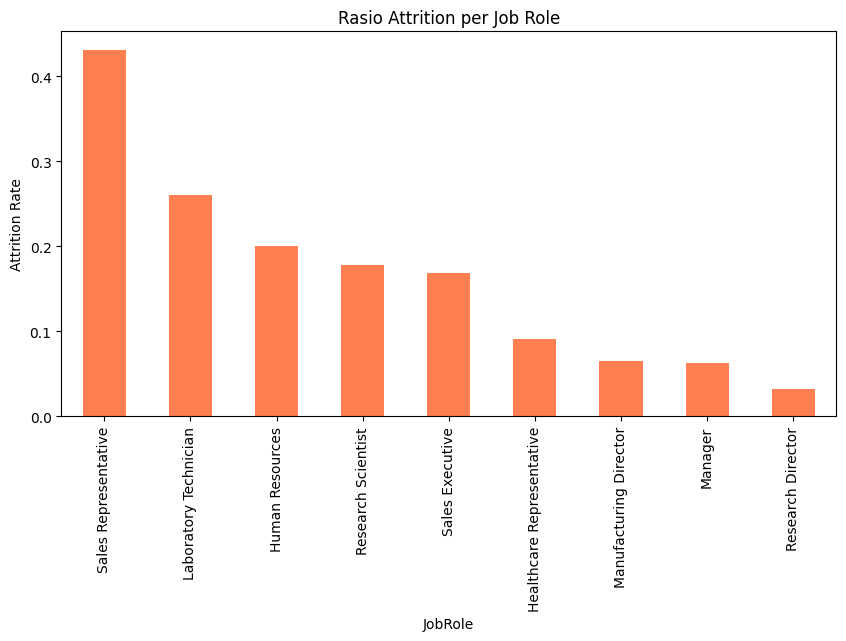

In [17]:
# Distribusi berdasarkan Job Role
role_attr = df.groupby('JobRole')['Attrition'].mean().sort_values(ascending=False)
role_attr.plot(kind='bar', color='coral', figsize=(10,5))
plt.title('Rasio Attrition per Job Role')
plt.ylabel('Attrition Rate')
plt.show()


Grafik ini menampilkan rasio attrition tertinggi berada pada peran Sales Representative, diikuti oleh Laboratory Technician dan Human Resources. Job role yang memiliki tanggung jawab berat atau tekanan tinggi, namun tidak disertai dengan penghargaan atau pengembangan karier yang memadai, berkontribusi pada peningkatan risiko attrition. Sebaliknya, peran manajerial dan direktorat menunjukkan rasio attrition yang sangat rendah, kemungkinan besar karena stabilitas karier dan kompensasi yang lebih baik.

In [37]:
# Buat treemap: ukuran berdasarkan JobInvolvement, warna berdasarkan JobSatisfaction
fig = px.treemap(
    df_viz,
    path=['Department', 'JobRole'],
    values='JobInvolvement',
    color='JobSatisfaction',
    color_continuous_scale=px.colors.sequential.Mint,
    hover_data={
        'JobInvolvement': True,
        'JobSatisfaction': True,
        'Department': False,
        'JobRole': False
    }
)

# Kustomisasi tooltip hover
fig.update_traces(
    hovertemplate='<b>%{label}</b><br>Job Involvement: %{value}<br>Job Satisfaction: %{color}<extra></extra>'
)

# Atur layout dan tampilkan
fig.update_layout(
    title='Treemap: Job Involvement & Satisfaction per Department dan Job Role',
    margin=dict(t=50, l=25, r=25, b=25)
)

fig.show()

Treemap ini menunjukkan sebaran peran kerja dalam tiap departemen dengan ukuran yang merepresentasikan tingkat keterlibatan kerja dan kepuasan. Mayoritas karyawan berada di departemen Research & Development, dengan proporsi terbesar di peran Research Scientist dan Laboratory Technician. Di sisi lain, peran dalam Sales memiliki distribusi besar namun lebih rentan terhadap attrition berdasarkan visual sebelumnya. Ini menyiratkan pentingnya perbaikan pengalaman kerja di job role berisiko tinggi untuk menekan angka attrition secara menyeluruh.

# Data Preparation

In [87]:
# Hapus baris yang mengandung nilai null
df.dropna(inplace=True)
print("Shape setelah drop missing:", df.shape)

Shape setelah drop missing: (1058, 35)


In [88]:
# Drop kolom tidak informatif
df.drop(['EmployeeId', 'Over18', 'StandardHours', 'EmployeeCount', 'StandardHours'], axis=1, inplace=True)

In [89]:
# Encode kategori
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
  df[col] = LabelEncoder().fit_transform(df[col])

In [108]:
# Fitur dan target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Standardisasi
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

In [109]:
# Feature Selection using SelectKBest
k_best = SelectKBest(score_func=f_classif, k=5)
X_train_kbest = k_best.fit_transform(X_train, y_train)
X_test_kbest = k_best.transform(X_test)
selected_features = X.columns[k_best.get_support()]
print("Selected Features:", selected_features.tolist())

Selected Features: ['Age', 'MaritalStatus', 'OverTime', 'StockOptionLevel', 'TotalWorkingYears']


In [110]:
# Balancing Data SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_train_res, y_train_res = smote_enn.fit_resample(X_train_kbest, y_train)

print("Distribusi setelah SMOTEENN:", Counter(y_train_res))

Distribusi setelah SMOTEENN: Counter({1.0: 391, 0.0: 370})


# Modelling dan Tuning

In [112]:
# Model dan parameter grid
et = ExtraTreesClassifier(random_state=42)

param_grid_et = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': ['balanced', 'balanced_subsample']
}

grid_search_et = GridSearchCV(
    estimator=et,
    param_grid=param_grid_et,
    cv=3,
    scoring='f1',
    verbose=1,
    n_jobs=-1
)

# Fit model
grid_search_et.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=ExtraTreesClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 200, 300]},
             scoring='f1', verbose=1)

# Evaluation

              precision    recall  f1-score   support

      Stayed       0.90      0.77      0.83       176
   Attrition       0.34      0.58      0.43        36

    accuracy                           0.74       212
   macro avg       0.62      0.68      0.63       212
weighted avg       0.81      0.74      0.76       212



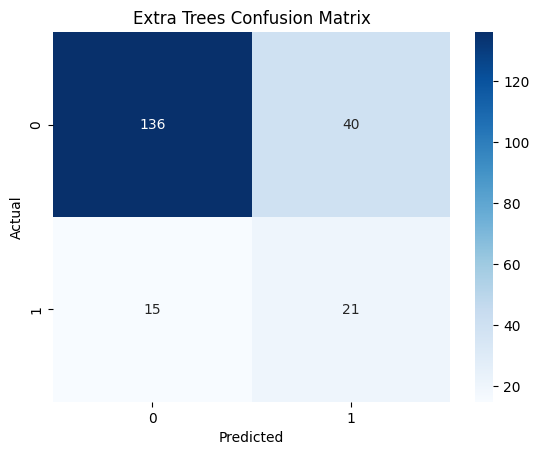

In [113]:
# Confusion matrix
def plot_confusion(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

# Evaluasi
best_et = grid_search_et.best_estimator_
y_pred_et = best_et.predict(X_test_kbest)

target_names = ['Stayed', 'Attrition']
print(classification_report(y_test, y_pred_et, target_names=target_names))
plot_confusion(y_test, y_pred_et, "Extra Trees Confusion Matrix")

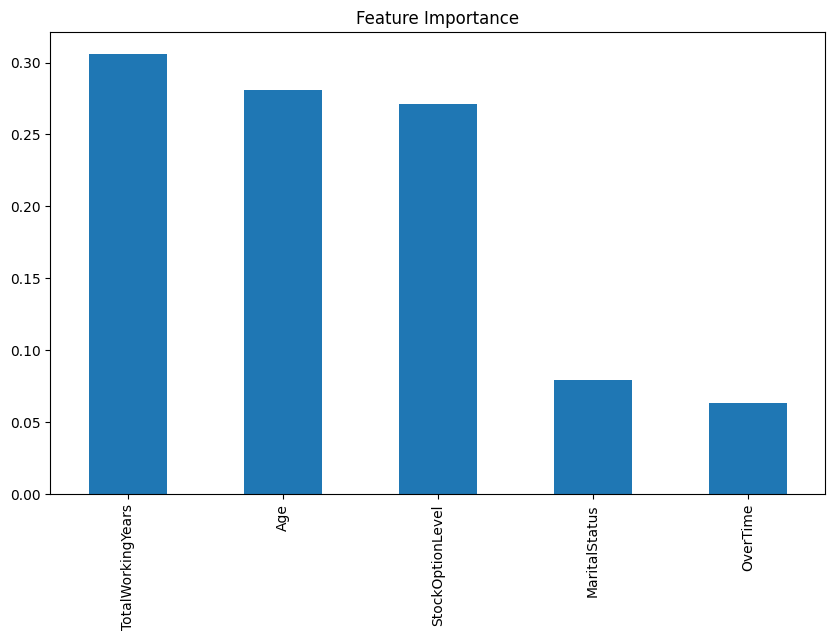

In [98]:
# Feature Importance
feat_imp = pd.Series(best_et.feature_importances_, index=selected_features).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feat_imp.plot(kind='bar')
plt.title("Feature Importance")
plt.show()

Berdasarkan hasil Feature Importance, dapat dilihat bahwa variabel OverTime memiliki kontribusi terbesar dalam model, dengan nilai 0.304197, menunjukkan bahwa apakah seorang karyawan bekerja lembur sangat berpengaruh terhadap kemungkinan attrition. TotalWorkingYears di urutan kedua dengan nilai 0.213756, menandakan bahwa durasi bekerja seseorang juga merupakan faktor penting yang mempengaruhi keputusan karyawan untuk bertahan atau keluar. Age berada di posisi ketiga dengan 0.201954, yang menunjukkan bahwa usia karyawan juga memainkan peran penting dalam prediksi attrition. StockOptionLevel memiliki kontribusi yang cukup besar dengan 0.153216, mengindikasikan bahwa karyawan dengan opsi saham memiliki kecenderungan tertentu dalam keputusan mereka untuk tetap bertahan atau keluar. Terakhir, MaritalStatus dengan nilai 0.126877 berperan dalam menentukan kemungkinan attrition, meskipun pengaruhnya sedikit lebih kecil dibandingkan fitur lainnya.

In [99]:
# save model format pkl
joblib.dump((best_et, scaler, selected_features), "model_pipeline.pkl")

['model_pipeline.pkl']